# День 3

## Необходимые импорты

In [1]:
! pip install opencv-python pandas seaborn torch requests jupyter ipywidgets

  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12

In [2]:
import pandas as pd
import cv2
import seaborn as sbs
import glob
import torch

## Выгрузка изображений

Для того, чтобы нам работать с изоражениями, сначала их нужно открыть с помощью библиотеки OpenCV. 

Каждое изображение представляется в виде матрицы (таблицы), в которой каждый элемент (ячейка) обозначает цвет одного пикселя. 

Каждый пиксель в свою очередь кодируется по умолчанию тремя значениями: Blue, Green, Red от 0 до 255

### Откроем все картинки в поддиректориях ../datasets/example

In [3]:
images = [cv2.imread(i) for i in glob.glob("../datasets/example/*/*")]

In [4]:
len(images)

1000

### Узнаем, какое разрешение изображения

In [5]:
images[0].shape

(500, 374, 3)

Это значит, что это изображение 500x374, каждый пиксель закодирован тремя значениями

## Модель YOLO

YOLO англ. You Only Look Once — ты смотришь только раз — семейство открытых моделей машинного обучения, предназначенное для распознавания объектов на фото и видео.

Название YOLO — «ты смотришь только раз» — отражает идею продукта обнаружения объектов «на лету» (в реальном времени). 
 
Решает три основных задачи распознавания изображений: классификацию, обнаружение, сегментацию. 

### Загрузим модель YOLO

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/horart/.cache/torch/hub/ultralytics_yolov5_master


  Using cached ultralytics-8.3.53-py3-none-any.whl.metadata (35 kB)
  Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.13-py3-none-any.whl.metadata (9.4 kB)
Using cached ultralytics-8.3.53-py3-none-any.whl (902 kB)
Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl (7.2 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached ultralytics_thop-2.0.13-py3-none-any.whl (26 kB)
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-12-19 Python-3.12.3 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


### Распознаем объекты на первых пяти и на последних пяти изображениях

/home/horart/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


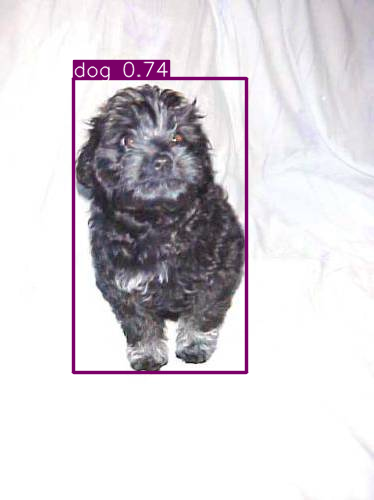

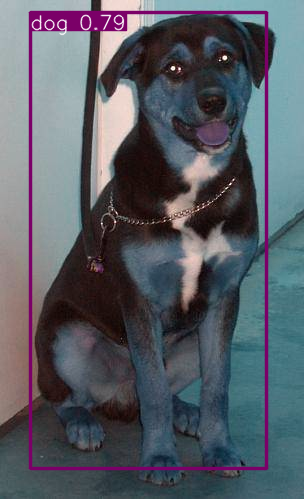

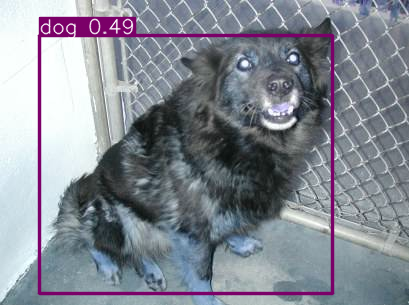

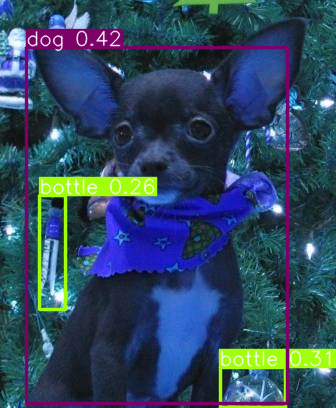

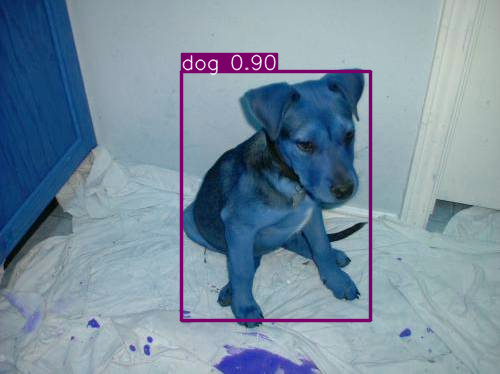

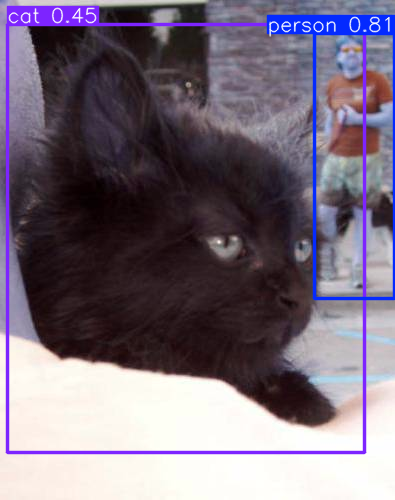

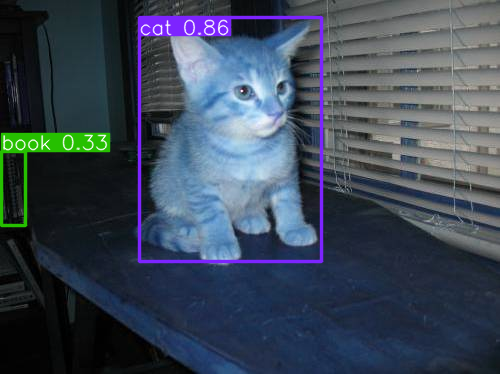

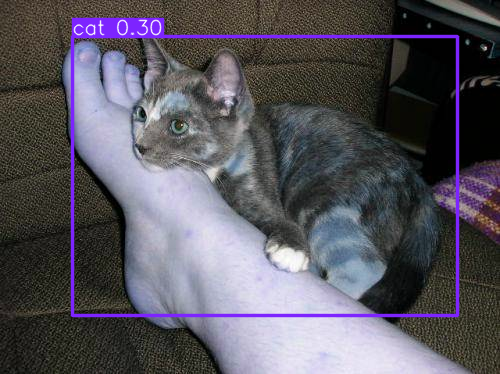

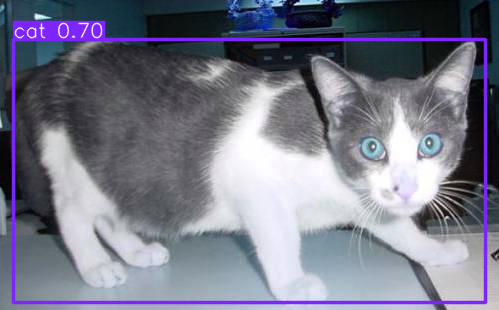

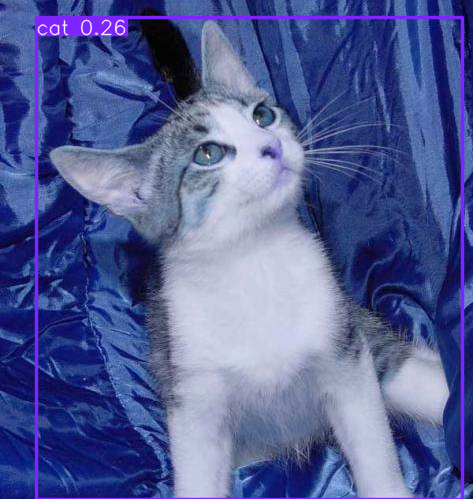

In [7]:
images_sel = images[:5] + images[-5:]
results = model(images_sel)
results.show()

### Выведем распознанные объекты на шестой фотографии

In [8]:
results.pandas().xyxy[5]

,xmin,ymin,xmax,ymax,confidence,class,name
0,314.566528,33.993233,394.139008,298.022095,0.809960,0,person
1,7.456768,24.413038,364.382904,452.060425,0.453928,15,cat


Здесь 
 * xmin - левая граница
 * xmax - правая граница
 * ymin - нижняя граница
 * ymax - верхняя граница
 * confidence - уверенность в опознании
 * class - номер класса объекта
 * name - имя класса объекта

# Задание

In [2]:
! pip install deepface
! wget http://158.109.8.102/FirstImpressionsV2/train-1.zip ../datasets

--2024-12-23 19:34:44--  http://158.109.8.102/FirstImpressionsV2/train-1.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2784614760 (2.6G) [application/zip]
Saving to: ‘train-1.zip’

train-1.zip          45%[========>           ]   1.18G  4.46MB/s    eta 6m 47s 

В Интернете найдите документацию по python библиотеке DeepFace.

Разархивируйте train-1.zip

Вам необходимо проанализировать видео-визитки для собеседований на эмоции и вывести статистику по эмоциям

Подсказка: для общей эмоциональной характеристики видео можно взять из него несколько кадров в разных точках времени, и найти их среднее арифмитическое

Затем c помощью методов машинного обучения попытайтесь найти связь между эмоциональной характеристикой видео и большой пятеркой характера (данные большой пятерки можете найти в папке )